In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train["Age"] = train["Age"].fillna(train["Age"].median())
test["Age"] = test["Age"].fillna(test["Age"].median())

In [4]:
train = train.fillna({"Embarked": "S"})

In [5]:
train["Pclass"] = train["Pclass"].fillna(train["Pclass"].mode())

In [6]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

In [7]:
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

In [8]:
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [9]:
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

In [10]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)


In [11]:
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

In [12]:
train = train.drop(['PassengerId'], axis = 1)

In [13]:
from sklearn.model_selection import train_test_split

X = train.drop(['Survived'], axis=1)
y = train["Survived"]
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [15]:
log_model = LogisticRegression()
nb_model = GaussianNB()
svc_model = SVC()
des_model = DecisionTreeClassifier(criterion="entropy")

In [16]:
models = [
    {
        'label': 'Logistic Regression',
        'model': log_model
    },
    {
        'label': 'Naive Bayes',
        'model': nb_model
    },
    {
        'label': 'Support Vector Machine',
        'model': svc_model
    },
    {
        'label': 'Decision Tree Classification',
        'model': des_model
    }
]

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

C:\Users\smrithi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\smrithi\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<Figure size 432x288 with 0 Axes>

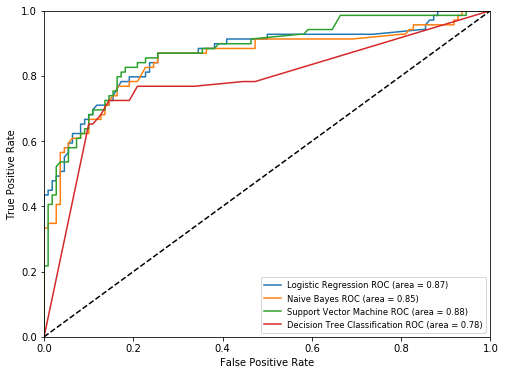

In [18]:
plt.clf()
plt.figure(figsize=(8,6))
for m in models:
    m['model'].probability = True
    probas = m['model'].fit(xtrain,ytrain).predict_proba(xtest)
    fpr, tpr, thresholds = roc_curve(ytest, probas[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')
plt.show()